# Proyek Proposal Restoran Baru

Sebagai seseorang yang ingin berbisnis, akan dibuka usaha restoran kecil di Los Angeles dengan konsep robot sebagai pelayannya. Namun hal ini menyebabkan perlunya modal yang tinggi sehingga perlu menarik minat para investor. Para investor tertarik untuk mengetahui kondisi pasar saat ini. Oleh karena itu perlu dilakukan pengolahan data terkait jenis - jenis usaha tempat makan di LA untuk mengetahui apakah dengan kondisi daya tarik robot yang semakin memudar bisa untuk mempertahankan kesuksesan dari restoran tersebut

Dalam pengerjaan proyek ini akan dilakukan tahapan analisis yakni: pra-pemrosesan yang mencakup pemanggilan library, pemanggilan dataset, pengeksplorasian data awal, pemrosesan data, analisis data, dan ditutup dengan kesimpulan.

## Pra-pemrosesan

### Pemanggilan library

Pertama dilakukan pemanggilan library yang akan digunakan dalam pengerjaan proyek ini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Pemanggilan dataset

Selanjutnya dilakukan pemanggilan dataset yang akan digunakan dalam proyek ini

In [3]:
try:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')
except:
    rest_data = pd.read_csv('C:/Users/ASUS/rest_data_us.csv')

### Pengeksplorasian data awal

Pada kegiatan analisis ini, hanya terdapat 1 dataset yakni `rest_data` yang memiliki kolom sebagai berikut:
- `object_name` — nama usaha
- `chain` — usaha berbasis rantai (TRUE/FALSE)
- `object_type` — jenis usaha
- `address` — alamat
- `number` — jumlah kursi

In [4]:
rest_data.shape

(9651, 6)

In [5]:
rest_data.info(memory_usage='deep')
rest_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [6]:
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [7]:
rest_data.duplicated().sum()

0

In [8]:
rest_data[rest_data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Dari hasil pengeksplorasian dataset `rest_data`, ditemukan bahwa dataset tidak mengandung nilai duplikat, namun terdapat 3 niali yang hilang. Nilai ini akan dihilangkan dikarenakan jumlah nilai yang hilang sangat kecil dibandingkan jumlah keseluruhan data. Untuk penulisan pada judul kolom juga dirasa sudah benar tidak perlu diubah, dan untuk tipe datanya memang sudah sesuai, namun untuk mengurangi memori yang digunakan dalam kegiatan analisa berikutnya akan dilakukan pengubahan tipe data pada kolom `chain`. Terakhir, isi pada kolom `object_name` dan `address` akan diubah menjadi huruf kecil.

## Pemrosesan Data

Selanjutnya akan dilakukan pemrosesan data yakni mengubah tipe data pada beberapa kolom agar memori yang digunakan semakin kecil. Pertama akan dihilangkan nilai yang hilang

In [9]:
rest_data = rest_data.dropna()
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


Selanjutnya akan diubah tipe data pada `chain` karena hanya memuat boolean saja (True dan False)

In [10]:
rest_data['chain'] = rest_data['chain'].astype(bool)
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 2.2 MB


Terakhir, akan diubah isi pada kolom `object_name` dan `address`

In [11]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


### Kesimpulan Sementara

Telah dilakukan pemrosesan data sebagai berikut:
- Menghilangkan 3 data yang mengandung nilai yang hilang
- Mengubah tipedata kolom `chain`
- Mengubah isi kolom `object_name` dan `address` menjadi huruf kecil

## Analisis Data

Setelah dilakukan pemrosesan data, maka selanjutnya akan dilakukan analisis data

### Proporsi dari berbagai jenis usaha

Pertama akan dicari proporsi dari berbagai jenis usaha, pertama adalah mengelompokan sesuai usaha yang dimiliki dan menghitungnya

In [12]:
proportion_type = rest_data.groupby('object_type')['id'].count().reset_index()
proportion_type = proportion_type.sort_values('id', ascending=False)
proportion_type

,object_type,id
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292
0,Bakery,283


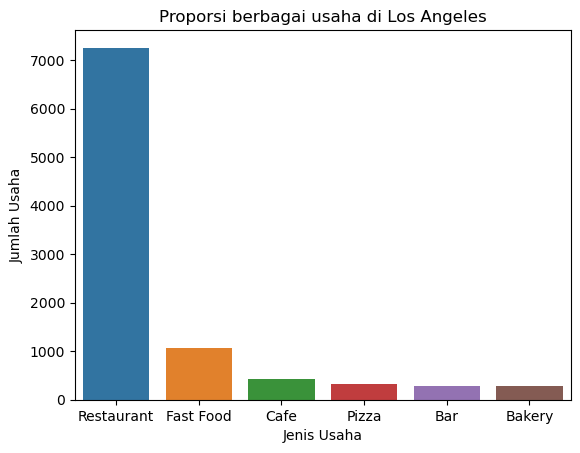

In [13]:
ax = sns.barplot(x='object_type', y='id', data=proportion_type)
ax.set_title('Proporsi berbagai usaha di Los Angeles')
ax.set_xlabel('Jenis Usaha')
ax.set_ylabel('Jumlah Usaha')
plt.show()

Dari grafik diatas dapat terlihat bahwa mayoritas usaha tempat makanan yang ada di Los Angeles adalah restoran, diikuti oleh fast food dan kafe.

### Proporsi dari usaha berbasis waralaba

Selanjutnya akan dicari proporsi dari usaha berbasis waralaba

In [14]:
proportion_frenchise = rest_data.groupby('chain')['id'].count().reset_index()
proportion_frenchise

,chain,id
0,False,5972
1,True,3676


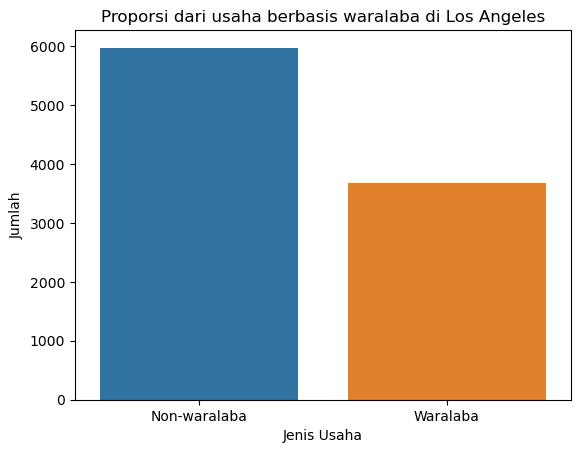

In [15]:
ax = sns.barplot(x='chain', y='id', data=proportion_frenchise)
ax.set_title('Proporsi dari usaha berbasis waralaba di Los Angeles')
ax.set_xlabel('Jenis Usaha')
ax.set_ylabel('Jumlah')
ax.set_xticklabels(['Non-waralaba', 'Waralaba'])
plt.show()

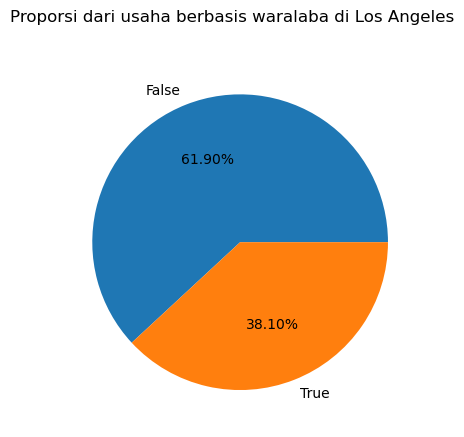

In [16]:
plt.pie(proportion_frenchise['id'], labels=proportion_frenchise['chain'], autopct='%.2f%%')
plt.suptitle('Proporsi dari usaha berbasis waralaba di Los Angeles')
plt.show()

Dari hasil analisa dapat dilihat bahwa jumlah jenis usaha berbasis non-waralaba lebih banyak dibandingkan jenis usaha berbasis waralaba, dengan non-waralaba memiliki total persentase 61,90% dari jumlah keseluruhan usaha tempat makan, dibandingkan dengan waralaba yang hanya memiliki total persentase 38,10%.

### Proporsi dari tipe usaha berbasis waralaba

Apabila sebelumnya telah dilihat proporsi dari jenis usaha ataupun waralaba, kali ini akan dilihat proporsi dari tipe usaha berbasis waralaba, sehingga akan dilihat untuk jenis usaha tertentu apakah waralaba atau non-waralaba yang mendominasi

In [17]:
type_chain = rest_data.groupby(['object_type', 'chain'])['id'].count().reset_index()
type_chain

,object_type,chain,id
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,166
8,Pizza,True,153
9,Restaurant,False,4961


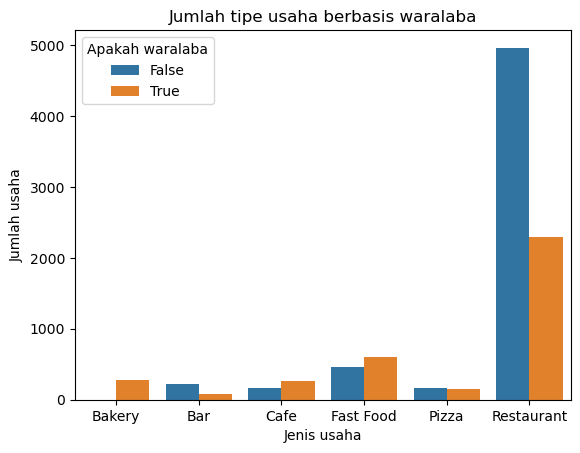

In [18]:
ax = sns.barplot(x='object_type', y='id', hue='chain', data=type_chain)
ax.set_title('Jumlah tipe usaha berbasis waralaba')
ax.set_xlabel('Jenis usaha')
ax.set_ylabel('Jumlah usaha')
plt.legend(title='Apakah waralaba',loc='upper left')
plt.show()

In [19]:
grouped_chain = type_chain.pivot(index='object_type', columns='chain').fillna(0)
grouped_chain.columns = grouped_chain.columns.droplevel(0)
grouped_chain

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [20]:
grouped_chain['ratio'] = grouped_chain[True] / (grouped_chain[True] + grouped_chain[False])
grouped_chain = grouped_chain.sort_values(by='ratio', ascending=False)
grouped_chain

chain,False,True,ratio
object_type,,,
Bakery,0.0,283.0,1.000000
Cafe,169.0,266.0,0.611494
Fast Food,461.0,605.0,0.567542
Pizza,166.0,153.0,0.479624
Restaurant,4961.0,2292.0,0.316007
Bar,215.0,77.0,0.263699


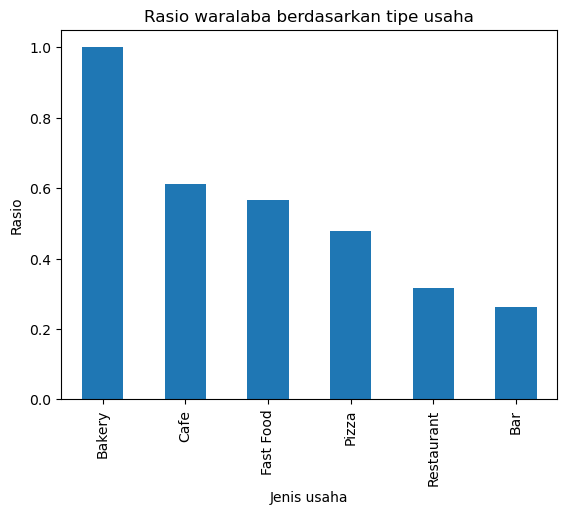

In [21]:
grouped_chain['ratio'].plot.bar()
plt.title('Rasio waralaba berdasarkan tipe usaha')
plt.xlabel('Jenis usaha')
plt.ylabel('Rasio')
plt.show()

Dari grafik diatas dapat terlihat bahwa untuk usaha bakery, 100% usaha tersebut merupakan waralaba, sehingga bakery merupakan usaha yang didominasi oleh waralaba. Selain itu, usaha cafe dan fast food juga didominasi oleh waralaba, yang masing - masing sekitar 61% dan 56% dari total keseluruhan jenis usaha. Lalu usaha yang didominasi oleh non-waralaba adalah bar dan restoran. Sedangkan untuk usaha pizza, tidak ada yang mendominasi secara signifikan, baik waralaba maupun non-waralaba

### Frekuensi jumlah kursi pada usaha waralaba

Selanjutnya akan dicari apa yang menjadi ciri khas dari usaha waralaba, pada proyek ini akan dilihat frekuensi jumlah kursi pada bisnis waralaba. Pertama akan dibuat dataset baru yang memuat hanya waralaba, lalu dicari frekuensinya

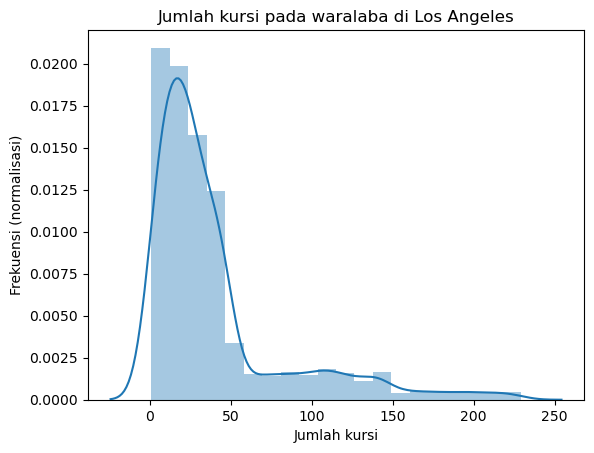

In [22]:
frenchise_data = rest_data[rest_data['chain'] == True]
ax = sns.distplot(frenchise_data['number'], bins=20)
ax.set_title('Jumlah kursi pada waralaba di Los Angeles')
ax.set_xlabel('Jumlah kursi')
ax.set_ylabel('Frekuensi (normalisasi)')
plt.show()

Dari grafik dapat terlihat bahwa mayoritas usaha waralaba memiliki jumlah kursi dibawah 50 buah, sehingga dapat disimpulkan bahwa waralaba umumnya memiliki ciri - ciri jumlah kursi dibawah 50 buah.

### Rata - rata kursi untuk setiap jenis usaha

Apabila sebelumnya telah dicari jumlah kursi yang dimiliki oleh usaha waralaba, selanjutnya akan dicara rata - rata kursi untuk setiap jenis usaha

In [23]:
chair = rest_data.groupby('object_type').agg(mean=('number', 'mean'), median = ('number', 'median')).sort_values('mean')
chair

,mean,median
object_type,,
Bakery,21.773852,18.0
Cafe,25.000000,21.0
Pizza,28.545455,19.0
Fast Food,31.837711,21.0
Bar,44.767123,28.5
Restaurant,48.048807,29.0


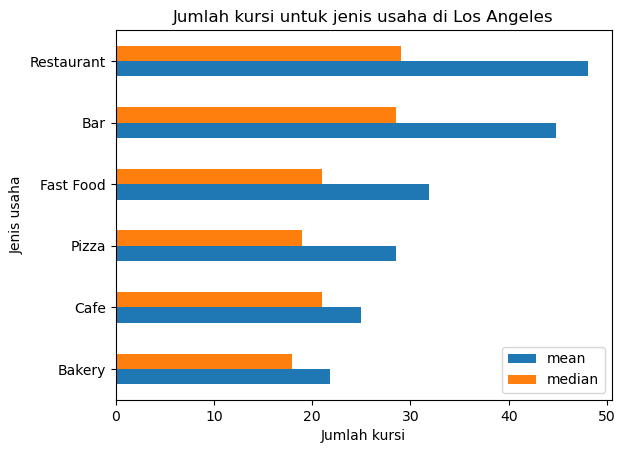

In [24]:
chair.plot(kind='barh')
plt.title('Jumlah kursi untuk jenis usaha di Los Angeles')
plt.xlabel('Jumlah kursi')
plt.ylabel('Jenis usaha')
plt.show()

Dari grafik dapat terlihat bahwa restoran memiliki rata - rata jumlah kursi terbanyak, hampir 50 kursi, diikuti oleh bar dan fast food. Hal ini wajar mengingat bahwa 3 jenis usaha ini sangat memerlukan jumlah kursi yang cukup banyak dikarenakan jenis usaha ini adalah usaha yang mengandalkan pengunjung untuk makan ditempat. Bakery memiliki rata - rata jumlah kursi terendah, hal ini dapat disebabkan karena mayoritas pembeli roti ingin untuk dibawa pulang ke rumah sehingga tidak memerlukan jumlah kursi yang banyak.

Selain itu dari grafik dapat terlihat bahwa nilai median dari bar dan restoran tidak berbeda jauh walaupun terdapat perbedaan yang signifikan dari nilai rata - rata nya. Hal ini dapat disebabkan karena terdapat outlier pada restoran sehingga terdapat tidak sedikit restoran yang memiliki jumlah kursi yang banyak namun dikarenakan nilai ini kalah dibandingkan restoran yang memiliki lebih sedikit kursi sehingga nilai median nya lebih rendah.

### Sepuluh nama jalan teratas berdasarkan jumlah usaha restoran

Selanjutnya akan dicari sepuluh jalan teratas berdasarkan jumlah usaha restoran. Untuk bisa mendapatkan sepuluh jalan teratas pertama harus diubah terlebih dahulu nama jalan dari kolom `address`

In [25]:
rest_data['street_name'] = rest_data['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
rest_data.head(10)

,id,object_name,address,chain,object_type,number,street_name
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,n eagle rock blvd
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world way # 120
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood blvd # 253
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,w sunset blvd
4,11790,pollen,2100 echo park ave,False,Restaurant,20,echo park ave
5,11791,the spot grill,10004 national blvd,False,Restaurant,14,national blvd
6,11792,cpk,100 world way # 126,False,Restaurant,100,world way # 126
7,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7,w 6th st ste 226
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1,n san fernando rd unit 103
9,11795,upstairs,3707 n cahuenga blvd,False,Restaurant,35,n cahuenga blvd


Setelah diambil hanya nama jalan saja, selanjutnya akan dicari sepuluh nama jalan teratas

In [26]:
restaurant_data = rest_data[rest_data['object_type'] == 'Restaurant'].reset_index(drop=True)
restaurant_street = restaurant_data.groupby('street_name')['id'].count().reset_index()
top10_street = restaurant_street.sort_values(by='id', ascending=False)[:10]
top10_street

,street_name,id
2182,w sunset blvd,218
2131,w pico blvd,218
470,hollywood blvd,137
2299,wilshire blvd,131
1756,w 3rd st,119
1378,s vermont ave,107
2056,w olympic blvd,107
1549,santa monica blvd,107
612,melrose ave,106
125,beverly blvd,103


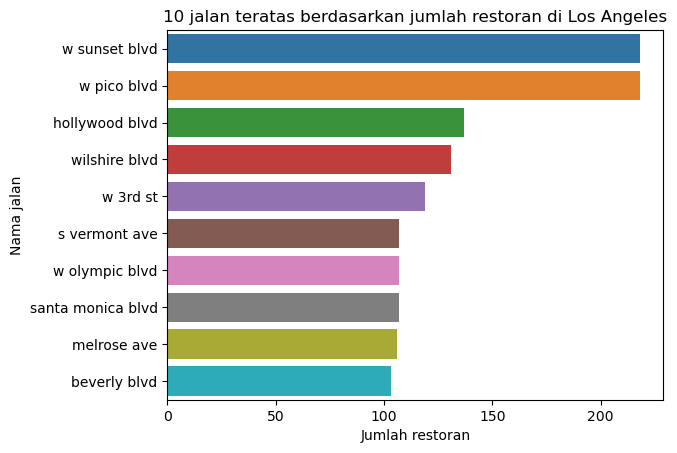

In [27]:
ax = sns.barplot(x= 'id', y='street_name', data=top10_street)
ax.set_title('10 jalan teratas berdasarkan jumlah restoran di Los Angeles')
ax.set_xlabel('Jumlah restoran')
ax.set_ylabel('Nama jalan')

plt.show()

Dari grafik dapat terlihat jalan W Sunset Blvd dan W Pico Blvd memiliki jumlah restoran yang sama yakni 218 buah, diikuti oleh Hollywood Blvd dan wWlshire Blvd

### Jumlah jalan yang hanya memiliki 1 restoran

Selanjutnya akan dianalisis jumlah jalan yang hanya memiliki 1 restoran

In [28]:
print('Jumlah jalan yang hanya memiliki 1 restoran saja:', restaurant_street[restaurant_street['id'] == 1]['id'].count())
print('Persentase jalan yang hanya memiliki 1 restoran saja: {:.2%}'.format(restaurant_street[restaurant_street['id'] == 1]['id'].count()/restaurant_street['id'].count()))

Jumlah jalan yang hanya memiliki 1 restoran saja: 1994
Persentase jalan yang hanya memiliki 1 restoran saja: 79.82%


Dapat dilihat bahwa terdapat 1994 jalan yang hanya memiliki 1 restoran saja, dengan nilai ini merepresentasikan 79,82% dari keseluruhan total jalan di Los Angeles. Sehingga dapat disimpulkan bahwa mayoritas jalan di Los Angeles hanya memiliki 1 jalan saja.

### Tren jumlah kursi untuk jalan yang dihuni oleh banyak restoran

Terakhir akan dilihat tren dari jumlah kursi untuk jalan yang dihuni oleh banyak restoran, pada kasus ini akan dilihat untuk 10 jalan dengan jumlah restoran terbanyak

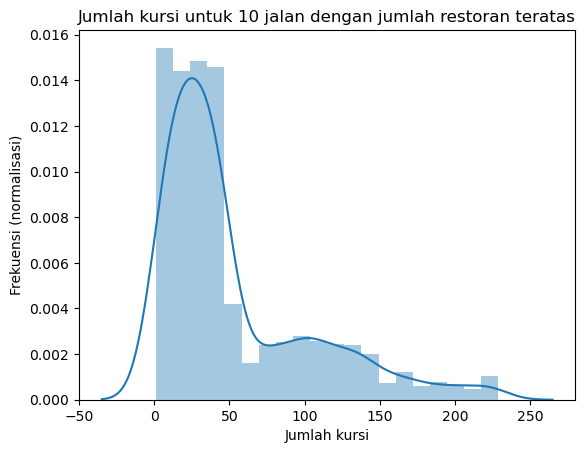

In [29]:
ax = sns.distplot(restaurant_data[restaurant_data['street_name'].isin(top10_street['street_name'])]['number'], bins=20)
ax.set_title('Jumlah kursi untuk 10 jalan dengan jumlah restoran teratas')
ax.set_xlabel('Jumlah kursi')
ax.set_ylabel('Frekuensi (normalisasi)')
plt.show()

Dari grafik dapat terlihat bahwa untuk 10 jalan dengan jumlah restoran terbanyak, ternyata mayoritas jumlah kursinya hanya kurang dari 50 buah. Hal ini wajar mengingat pada grafik sebelumnya rata - rata jumlah kursi pada restoran berjumlah sekitar 50 kursi. Selain itu, kurva distribusi diatas mirip dengan frekuensi jumlah kursi untuk usaha waralaba, dan dengan mayoritas restoran merupakan usaha waralaba sehingga tren yang dimiliki hampir mirip.

## Kesimpulan

Dari kegiatan analisa ini didapatkan berbagai kesimpulan:
- Pada dataset `rest_data` terdapat beberapa nilai yang hilang, pengubahan format penulisan, dan pengubahan tipe data
- Mayoritas di Los Angeles usaha tempat makan yang dimiliki adalah restoran, dengan mayoritas restoran merupakan usaha non-waralaba
- Untuk usaha waralaba, mayoritas jumlah kursi yang dimiliki kurang dari 50 buah, dan dari tiap jenis usaha juga memperlihatkan bahwa rata - rata jumlah kursi yang dimiliki kurang dari 50 buah
- W Sunset Boulevard dan W Pico Boulevard adalah 2 jalan dengan jumlah restoran terbanyak
- Terdapat 1994 jalan di Los Angeles yang hanya memiliki 1 restoran, atau sekitar 79,82% dari keseluruhan jalan di Los Angeles
- Untuk 10 jalan dengan jumlah restoran teratas, mayoritas jumlah kursi yang dimiliki kurang dari 50 buah

Sehingga, dengan banyaknya restoran di Los Angeles, terdapat 2 alternatif untuk jenis usaha tempat makan berbasis robot:
- Mengikuti tren yang ada, yakni restoran non-waralaba namun memiliki kelamahan yakni sulit bersaing dengan pasar namun disisi lain bisa memiliki aturan inovasi yang longgar
- Mengambil alternatif yang masih sepi tapi masih memiliki awal yang lebih baik, seperti kafe atau bakery yang berbasis waralaba, namun kelemahannya adalah perlunya mencari waralaba yang longgar dalam aturan inovasi

dengan jumlah kursi yang dimiliki kurang dari 50 buah. Jumlah kursi yang sedikit cocok untuk tempat makan berbasis robot dikarenakan luas area kecil, mudah untuk mobilisasi, dan mengurangi resiko terjadinya kesalahan ataupun kerusakan.

Selain itu, hasil proyek ini telah dibuat pula dalam bentuk presentasi

Presentasi: <https://drive.google.com/file/d/1YY7FiOWy4tW3vP49KIOu7NDFnepUgx4A/view?usp=share_link>